In [ ]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from Wrapper_FS import *
from hybrid_FS import *

np.random.seed(1)
random.seed(1)

# Baseline with preselected genes for AE4

In [ ]:
#Load preprocess data
AE4 = np.array(pd.read_csv ('../data/processed_data/AE4intron.csv'))
y = np.array(AE4[:,-1],dtype=int)
AE4 = AE4[:,0:-1]

In [ ]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4,y,4)

In [ ]:
print(AE4.shape, len(pred))
acc = model.score_
print(acc)

In [ ]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Filter methods

# Mutual information maximizer (MIM)

In [ ]:
N = np.arange(100,8000,50)
best_subset, best_score = MIM(y, AE4, FamiliesClusters, compute_sensitivity,True,N, 3, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Mutual information feature selection (MIFS)


In [ ]:
N = np.arange(100,8000,50)
best_subset, best_score = MIFS(y, AE4, FamiliesClusters, compute_precision,True,N, 1, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Joint Mutual Information (JMI)

In [ ]:
N = np.arange(100,8000,50)
best_subset, best_score = JMI(y, AE4, FamiliesClusters, compute_precision ,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Double input symmetrical relevance (DISR)

[   1    3    5    6    7    8    9   10   13   24   25   26   29   32
   34   35   38   42   46   64   66   68   70   71   73   78   91  110
  113  114  115  122  128  130  131  136  156  162  163  177  196  198
  209  219  222  228  230  231  235  240  244  247  248  254  255  261
  263  265  274  278  279  280  281  282  286  292  295  298  300  301
  305  315  324  330  342  344  345  346  355  356  378  383  389  393
  395  397  398  399  400  412  413  415  416  429  439  441  447  451
  459  477  481  491  509  512  513  514  516  526  529  534  564  569
  575  585  590  605  606  616  625  633  634  637  641  652  655  656
  658  659  662  672  676  682  686  687  688  695  704  705  716  723
  731  732  735  736  741  748  751  753  758  761  762  771  773  774
  776  779  780  781  791  795  796  803  807  809  811  812  814  816
  834  842  845  848  853  857  860  862  866  868  873  875  877  880
  882  885  896  908  918  919  920  933  934  937  941  954  956  959
  963 

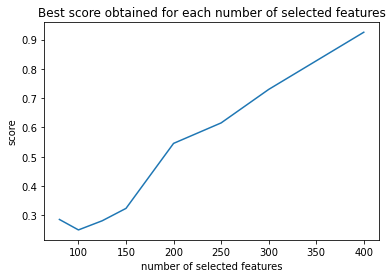

In [21]:
N = np.arange(100,8000,50)
best_subset, best_score = DISR(y, AE4, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Fisher's score

In [ ]:
N = np.arange(100,10000,50)
best_subset, best_score = fishers_score(y, AE4, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Laplacian score

In [ ]:
N = np.arange(100,10000,50)
best_subset, best_score = laplacian_score(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# ReliefF algorithm

In [ ]:
N = np.arange(100,10000,50)
best_subset, best_score = reliefF(y, AE4, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Fast Correlation Based Filter algorithm (FCBF)

In [ ]:
N = np.arange(100,10000,50)
best_subset, best_score = FCBF(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

In [ ]:
N = np.arange(100,10000,50)
best_subset, best_score = HsicLasso(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Wrapper methods

# Stochastic optimization of features selection 

In [ ]:
best_subset, best_score  = hillclimbing(y, AE4, FamiliesClusters, compute_sensitivity,True, 1000, 0.1, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Stimulated annealing

In [ ]:
best_subset, best_score  = stimulated_annealing(y,AE4, FamiliesClusters, compute_precision,True, 200, 0.1, 1, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Genetic feature selection algorithm

In [ ]:
best_subset, best_score  = genetic_fs(y,AE4,FamiliesClusters, compute_precision,True, 300, 0.5, 0.2, 50, 3, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Hybrid methods

# Mutual information and stimmulated annealing

In [ ]:
best_subset, best_score = MI_stimulated_annealing(y,AE4, FamiliesClusters, compute_sensitivity,True, np.array([400]), 3, 800, 0.1, 1, True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate 
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Mutual information and genetic feature selection

In [ ]:
best_subset, best_score = MI_genetic_fs(y,AE4, FamiliesClusters, compute_sensitivity,True, np.array([850]), 3,  100, 0.5, 0.2, 40, 3, True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Best method = 